# Train the functional use classifier

In [1]:
import sys
sys.path.append("./src") # append to system path

import json
import pandas as pd
import numpy as np

import modeling_tool as mt
from make_training_data import data_sampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

#static parameters
BATCH_SIZE = 1
RUGULARIZATION = 0.


# Dealing with data here

In [2]:
# load data
df = pd.read_csv('./data/0109_nine_functional_use_descs.csv',header=0)


# sample and split data
this_data = data_sampler()
this_data.sample_data(df, num_test_left=50)

trn_X_raw = this_data.trn_data['descs']

# add bias here
N,M = trn_X_raw.shape
trn_X = np.ones((N, M+1))
trn_X[:, 1:] = trn_X_raw
trn_Y = this_data.trn_data['target']

tst_X_raw = this_data.tst_data['descs']
N_tst, M_tst = tst_X_raw.shape
tst_X = np.ones((N_tst, M_tst+1))
tst_X[:, 1:] = tst_X_raw
tst_Y = this_data.tst_data['target']
target_names = np.unique(this_data.trn_data['class'])

from collections import Counter
print Counter(this_data.trn_data['class'])
print Counter(this_data.tst_data['class'])


Counter({'Fragrances': 400, 'Antibacterial': 400, 'Pesticides': 400, 'Antioxidant': 278, 'Chelating Agents': 191, 'Colorants': 170, 'Surfactants': 147, 'Solvents': 138, 'Oxidizing Agent': 67})
Counter({'Fragrances': 50, 'Oxidizing Agent': 50, 'Antioxidant': 50, 'Chelating Agents': 50, 'Antibacterial': 50, 'Solvents': 50, 'Surfactants': 50, 'Pesticides': 50, 'Colorants': 50})


# Initilize the training process

Epoch = 1, Training Accuracy = 6.71%, Testing Accuracy = 11.11%
Epoch = 2, Training Accuracy = 6.80%, Testing Accuracy = 11.11%
Epoch = 3, Training Accuracy = 8.99%, Testing Accuracy = 13.56%
Epoch = 4, Training Accuracy = 12.64%, Testing Accuracy = 16.22%
Epoch = 5, Training Accuracy = 15.97%, Testing Accuracy = 20.67%
Epoch = 6, Training Accuracy = 20.31%, Testing Accuracy = 27.56%
Epoch = 7, Training Accuracy = 24.10%, Testing Accuracy = 31.78%
Epoch = 8, Training Accuracy = 27.16%, Testing Accuracy = 35.11%
Epoch = 9, Training Accuracy = 29.48%, Testing Accuracy = 36.44%
Epoch = 10, Training Accuracy = 31.17%, Testing Accuracy = 38.67%
Epoch = 11, Training Accuracy = 32.91%, Testing Accuracy = 39.33%
Epoch = 12, Training Accuracy = 34.05%, Testing Accuracy = 40.67%
Epoch = 13, Training Accuracy = 35.37%, Testing Accuracy = 42.44%
Epoch = 14, Training Accuracy = 37.06%, Testing Accuracy = 43.78%
Epoch = 15, Training Accuracy = 38.11%, Testing Accuracy = 44.44%
Epoch = 16, Training A

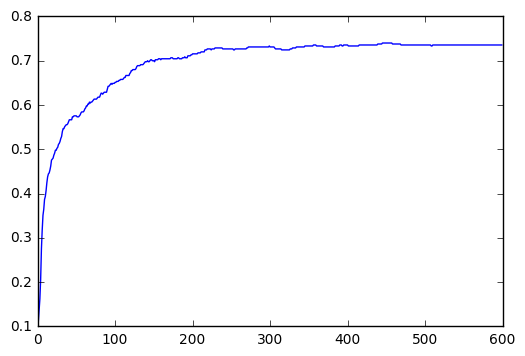

                  precision    recall  f1-score   support

   Antibacterial       0.65      0.64      0.65        50
     Antioxidant       0.72      0.68      0.70        50
Chelating Agents       0.71      0.64      0.67        50
       Colorants       0.80      0.78      0.79        50
      Fragrances       0.83      0.80      0.82        50
 Oxidizing Agent       0.81      0.52      0.63        50
      Pesticides       0.55      0.84      0.67        50
        Solvents       0.73      0.88      0.80        50
     Surfactants       0.95      0.84      0.89        50

     avg / total       0.75      0.74      0.74       450

[[32  3  2  1  3  1  8  0  0]
 [ 4 34  4  1  1  1  3  1  1]
 [ 6  2 32  3  1  1  5  0  0]
 [ 2  1  2 39  0  1  4  1  0]
 [ 0  0  0  0 40  0  5  5  0]
 [ 4  5  0  2  1 26  6  6  0]
 [ 0  2  2  1  0  1 42  2  0]
 [ 0  0  0  1  2  1  1 44  1]
 [ 1  0  3  1  0  0  2  1 42]]


In [3]:
this_classifier = mt.create_functional_use_classifier('./net/tensorflow_classifier_Jan12')
trn_X, tst_X, vec = this_classifier.fit_scaler(StandardScaler(),trn_X, tst_X)

# training
this_classifier.train(trn_X,trn_Y,tst_X,tst_Y, num_epoch=600, num_neroun=128,learning_rate=0.01)

# print out the training results
print classification_report(np.argmax(tst_Y,axis=1), this_classifier.predict(tst_X),target_names=target_names)
print confusion_matrix(np.argmax(tst_Y,axis=1), this_classifier.predict(tst_X))



# Save the Model

In [4]:
this_classifier.save_model('./net/tensorflow_classifier_Jan12.json')

model saved


## save this classification results to csv

In [5]:
def classifaction_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    return pd.DataFrame.from_dict(report_data)
   

this_report =classifaction_report_csv(classification_report(np.argmax(tst_Y,axis=1), this_classifier.predict(tst_X)))
this_confusion_matrix = confusion_matrix(np.argmax(tst_Y,axis=1), this_classifier.predict(tst_X))

this_report.to_csv('./results/classification_report_classifier_Jan12.csv')
np.savetxt('./results/conf_matrix_classifier_Jan12.csv',this_confusion_matrix, delimiter=',')

